This module implements the full linear dynamical system (LDS) described in 4360/6360 lecture. However, since we're already only working in 2D space, we won't need the dimensionality reduction step from appearance space to state space. Instead, we'll work directly with the "state" space component.

The first step is to gather your data, `X`, into a dimensions-by-frames matrix:

In [2]:
import ar
import numpy as np

In [5]:
### IGNORE ALL THIS--THIS IS JUST TO CREATE AN EXAMPLE THAT MIMICS THE T. GONDII DATA
M = np.load("dt1.npy")
Y = np.zeros(shape = (M.shape[1] * M.shape[2], M.shape[0]))
for i, f in enumerate(M):
    Y[:, i] = f.flatten()
X, _ = ar.state_space(Y, 2)  # We'll use a state space of 2 to simulate our T.gondii data.
print(X.shape)

(2, 74)


(pretend the first dimension is 2, for the $x$ and $y$ values at each frame)

$$
X = \begin{bmatrix} x_1 & x_2 & ... & x_f \\
y_1 & y_2 & ... & y_f \end{bmatrix}
$$

where $f$ is the number of frames in the video.

Then, you just call the `train` function, with the correct order (for us, we want 5):

In [7]:
A1, A2, A3, A4, A5 = ar.train(X, order = 5)

Just for grins we'll visualize the AR matrices, but they should all be $2 \times 2$:

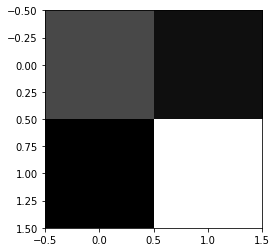

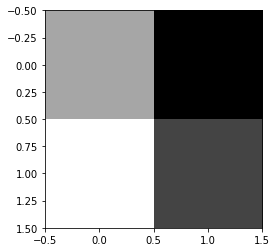

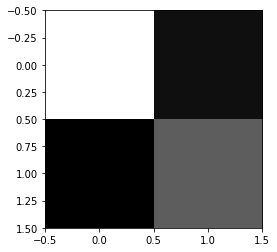

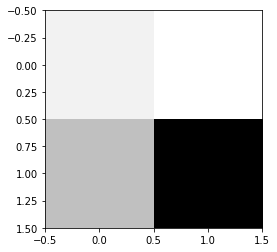

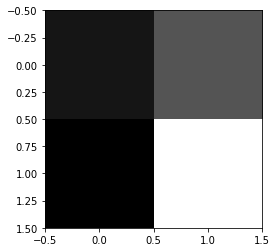

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(0)
plt.imshow(A1, cmap = "gray")
plt.figure(1)
plt.imshow(A2, cmap = "gray")
plt.figure(2)
plt.imshow(A3, cmap = "gray")
plt.figure(3)
plt.imshow(A4, cmap = "gray")
plt.figure(4)
plt.imshow(A5, cmap = "gray")
plt.show()

Flatten them all out and concatenate them as a single feature vector:

In [10]:
feature_vector = np.concatenate((A1.flatten(), A2.flatten(), A3.flatten(), A4.flatten(), A5.flatten()))
print(feature_vector.shape)

(20,)


Done! There's your feature vector representation of an object moving in 2D.